In [5]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Moving Average

[*********************100%***********************]  1 of 1 completed


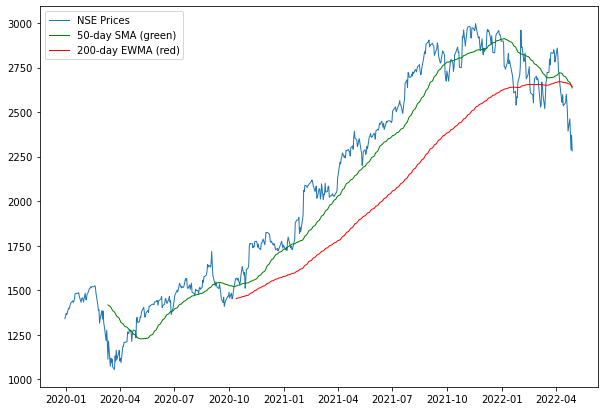

In [45]:
# Load the necessary packages and modules
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Simple Moving Average 
def SMA(data, ndays): 
    SMA = pd.Series(data['Close'].rolling(ndays).mean(), name = 'SMA') 
    data = data.join(SMA) 
    return data

# Exponentially-weighted Moving Average 
def EWMA(data, ndays): 
    EMA = pd.Series(data['Close'].ewm(span = ndays, min_periods = ndays - 1).mean(), 
                 name = 'EWMA_' + str(ndays)) 
    data = data.join(EMA) 
    return data

# Retrieve the Goolge stock data from Yahoo finance
data = yf.download('GOOGL', start="2020-01-01", end="2022-04-30")
close = data['Close']

# Compute the 50-day SMA
n = 50
SMA = SMA(data,n)
SMA = SMA.dropna()
SMA = SMA['SMA']

# Compute the 200-day EWMA
ew = 200
EWMA = EWMA(data,ew)
EWMA = EWMA.dropna()
EWMA = EWMA['EWMA_200']

# Plotting the Google stock Price Series chart and Moving Averages below
plt.figure(figsize=(10,7))
plt.plot(data['Close'],lw=1, label='NSE Prices')
plt.plot(SMA,'g',lw=1, label='50-day SMA (green)')
plt.plot(EWMA,'r', lw=1, label='200-day EWMA (red)')

# Add a legend to the axis
plt.legend()

plt.show()

# Bollinger Bands 

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

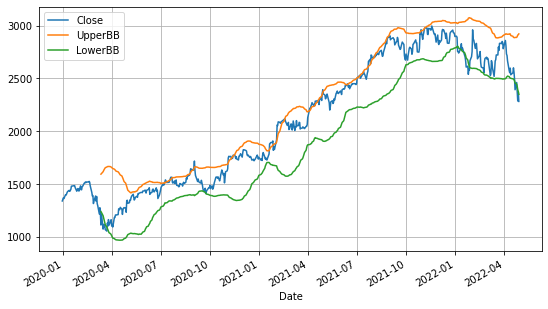

In [46]:
# Load the necessary packages and modules
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Compute the Bollinger Bands 
def BBANDS(data, window=n):
    MA = data.Close.rolling(window=n).mean()
    SD = data.Close.rolling(window=n).std()
    data['UpperBB'] = MA + (2 * SD) 
    data['LowerBB'] = MA - (2 * SD)
    return data
 
# Retrieve the Goolge stock data from Yahoo finance
data = yf.download('GOOGL', start="2020-01-01", end="2022-04-30")

# Compute the Bollinger Bands for Google using the 50-day Moving average
n = 50
BBANDS = BBANDS(data, n)

# Create the plot
pd.concat([BBANDS.Close, BBANDS.UpperBB, BBANDS.LowerBB],axis=1).plot(figsize=(9,5),grid=True)

# Relative Strength Index (RSI)

[*********************100%***********************]  1 of 1 completed


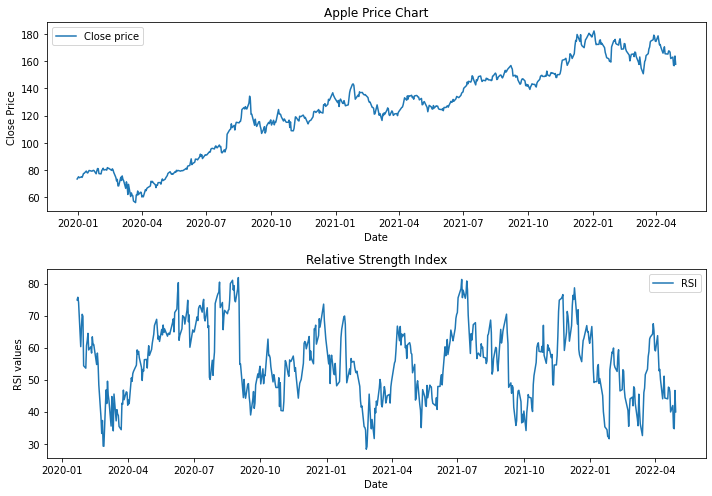

In [43]:
import pandas as pd
import numpy as np
import talib as ta

# Retrieve the Apple Inc. data from Yahoo finance
data = yf.download("AAPL", start="2020-01-01", end="2022-04-30")

# Call RSI function from the talib library to calculate RSI
data['RSI'] = ta.RSI(data['Close'], timeperiod=14)

# Plotting the Price Series chart and the Ease Of Movement below
fig = plt.figure(figsize=(10, 7))

# Define position of 1st subplot
ax = fig.add_subplot(2, 1, 1)

# Set the title and axis labels
plt.title('Apple Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.plot(data['Close'], label='Close price')

# Add a legend to the axis
plt.legend()

# Define position of 2nd subplot
bx = fig.add_subplot(2, 1, 2)

# Set the title and axis labels
plt.title('Relative Strength Index')
plt.xlabel('Date')
plt.ylabel('RSI values')

plt.plot(data['RSI'] , label='RSI')

# Add a legend to the axis
plt.legend()

plt.tight_layout()
plt.show()

# MFI

[*********************100%***********************]  1 of 1 completed


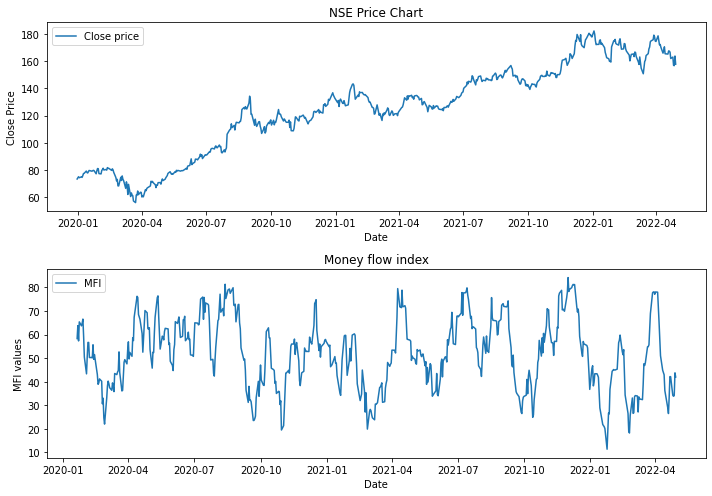

In [44]:
# Load the necessary packages and modules
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


def gain(x):
    return ((x > 0) * x).sum()


def loss(x):
    return ((x < 0) * x).sum()


# Calculate money flow index
def mfi(high, low, close, volume, n=14):
    typical_price = (high + low + close)/3
    money_flow = typical_price * volume
    mf_sign = np.where(typical_price > typical_price.shift(1), 1, -1)
    signed_mf = money_flow * mf_sign
    mf_avg_gain = signed_mf.rolling(n).apply(gain, raw=True)
    mf_avg_loss = signed_mf.rolling(n).apply(loss, raw=True)
    return (100 - (100 / (1 + (mf_avg_gain / abs(mf_avg_loss))))).to_numpy()


# Retrieve the Apple Inc. data from Yahoo finance
data = yf.download("AAPL", start="2020-01-01", end="2022-04-30")

data['MFI'] = mfi(data['High'], data['Low'], data['Close'], data['Volume'], 14)

# Plotting the Price Series chart and the Ease Of Movement below
fig = plt.figure(figsize=(10, 7))

# Define position of 1st subplot
ax = fig.add_subplot(2, 1, 1)

# Set the title and axis labels
plt.title('NSE Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.plot(data['Close'], label='Close price')

# Add a legend to the axis
plt.legend()

# Define position of 2nd subplot
bx = fig.add_subplot(2, 1, 2)

# Set the title and axis labels
plt.title('Money flow index')
plt.xlabel('Date')
plt.ylabel('MFI values')

plt.plot(data['MFI'], label='MFI')

# Add a legend to the axis
plt.legend()

plt.tight_layout()
plt.show()

# ATR

[*********************100%***********************]  1 of 1 completed


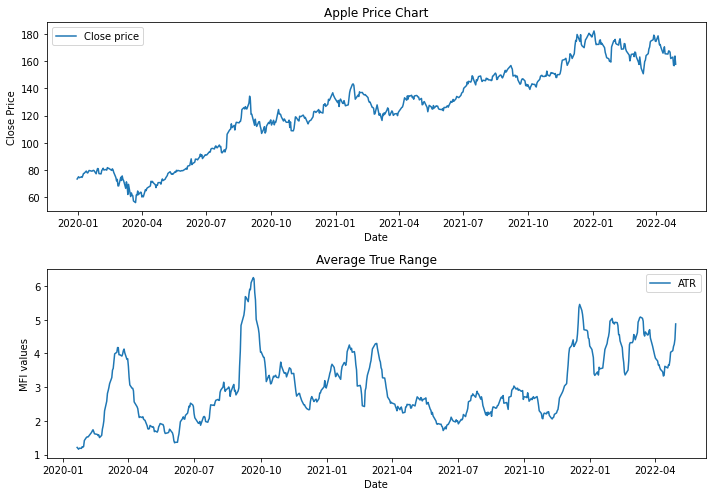

In [31]:
import pandas as pd
import numpy as np


def atr(high, low, close, n=14):
    tr = np.amax(np.vstack(((high - low).to_numpy(), (abs(high - close)).to_numpy(), (abs(low - close)).to_numpy())).T, axis=1)
    return pd.Series(tr).rolling(n).mean().to_numpy()

# Retrieve the Apple Inc. data from Yahoo finance
data = yf.download("AAPL", start="2020-01-01", end="2022-04-30")

data['ATR'] = atr(data['High'], data['Low'], data['Close'], 14)

# Plotting the Price Series chart and the Ease Of Movement below
fig = plt.figure(figsize=(10, 7))

# Define position of 1st subplot
ax = fig.add_subplot(2, 1, 1)

# Set the title and axis labels
plt.title('Apple Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.plot(data['Close'], label='Close price')

# Add a legend to the axis
plt.legend()

# Define position of 2nd subplot
bx = fig.add_subplot(2, 1, 2)

# Set the title and axis labels
plt.title('Average True Range')
plt.xlabel('Date')
plt.ylabel('ATR values')

plt.plot(data['ATR'] , label='ATR')

# Add a legend to the axis
plt.legend()

plt.tight_layout()
plt.show()

# Force Index 

In [1]:
# Load the necessary packages and modules
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Force Index 
def ForceIndex(data, ndays): 
    FI = pd.Series(data['Close'].diff(ndays) * data['Volume'], name = 'ForceIndex') 
    data = data.join(FI) 
    return data


# Retrieve the Apple Inc. data from Yahoo finance
data = yf.download("AAPL", start="2020-01-01", end="2022-04-30") 

# Compute the Force Index for AAPL
n = 1
AAPL_ForceIndex = ForceIndex(data,n)
AAPL_ForceIndex['ForceIndex']

[*********************100%***********************]  1 of 1 completed


Date
2019-12-31             NaN
2020-01-02    2.269301e+08
2020-01-03   -1.068161e+08
2020-01-06    7.014427e+07
2020-01-07   -3.837665e+07
                  ...     
2022-04-25    1.046917e+08
2022-04-26   -5.813892e+08
2022-04-27   -2.025416e+07
2022-04-28    9.206317e+08
2022-04-29   -7.882075e+08
Name: ForceIndex, Length: 588, dtype: float64

# Ease Of Movement (EMV)

[*********************100%***********************]  1 of 1 completed


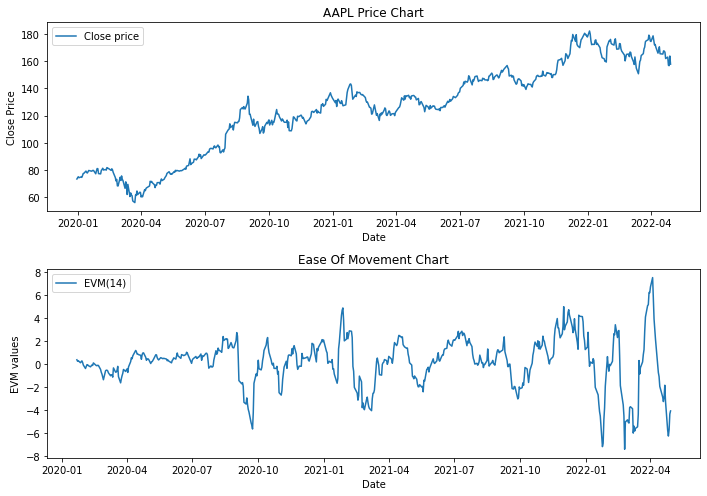

In [6]:
# Load the necessary packages and modules
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
 
# Ease of Movement 
def EVM(data, ndays): 
    dm = ((data['High'] + data['Low'])/2) - ((data['High'].shift(1) + data['Low'].shift(1))/2)
    br = (data['Volume'] / 100000000) / ((data['High'] - data['Low']))
    EVM = dm / br 
    EVM_MA = pd.Series(EVM.rolling(ndays).mean(), name = 'EVM') 
    data = data.join(EVM_MA) 
    return data 
 
# Retrieve the AAPL data from Yahoo finance
data = yf.download("AAPL", start="2020-01-01", end="2022-04-30")  

# Compute the 14-day Ease of Movement for AAPL
n = 14
AAPL_EVM = EVM(data, n)
EVM = AAPL_EVM['EVM']

# Plotting the Price Series chart and the Ease Of Movement below
fig = plt.figure(figsize=(10, 7))

# Define position of 1st subplot
ax = fig.add_subplot(2, 1, 1)

# Set the title and axis labels
plt.title('AAPL Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Plot the close price of the Apple
plt.plot(data['Close'], label='Close price')

# Add a legend to the axis
plt.legend()

# Define position of 2nd subplot
bx = fig.add_subplot(2, 1, 2)

# Set the title and axis labels
plt.title('Ease Of Movement Chart')
plt.xlabel('Date')
plt.ylabel('EVM values')

# Plot the ease of movement
plt.plot(EVM, label='EVM(14)')

# Add a legend to the axis
plt.legend()

plt.tight_layout()
plt.show()